In [1]:
import numpy as np
import pandas as pd

In [2]:
f=r'C:\Users\awang\Desktop\Notebook\UPDATED_NLP_COURSE\TextFiles\smsspamcollection.tsv'

In [4]:
df=pd.read_csv(f,sep='\t')

In [5]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
len(df)

5572

In [8]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [11]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

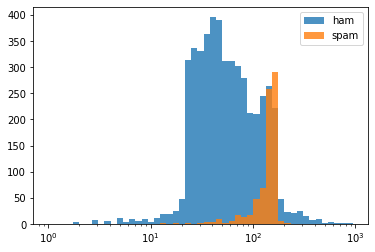

In [22]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [23]:
#perpare training data and testing data
## Create Feature and label sets
X=df[['length','punct']]
y=df['label']

In [24]:
# Train test split
from sklearn.model_selection import train_test_split


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (3900, 2)
Testing Data Shape:  (1672, 2)


In [28]:
#Train a logistic regression classifier
from sklearn.linear_model import LogisticRegression

In [29]:
lr_model=LogisticRegression(solver='lbfgs')

In [30]:
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
from sklearn import metrics

In [33]:
predictions = lr_model.predict(X_test)

In [36]:
print(metrics.confusion_matrix(y_test,predictions))

[[1438   29]
 [ 200    5]]


In [37]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.88      0.98      0.93      1467
        spam       0.15      0.02      0.04       205

    accuracy                           0.86      1672
   macro avg       0.51      0.50      0.48      1672
weighted avg       0.79      0.86      0.82      1672



In [38]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.8630382775119617


In [41]:
#train a naive bayes classifier

from sklearn.naive_bayes import MultinomialNB

In [47]:
y_train

1480     ham
2701     ham
178      ham
2244     ham
4368     ham
        ... 
1887    spam
2877     ham
4518     ham
502      ham
1978    spam
Name: label, Length: 3900, dtype: object

In [49]:
nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [50]:
predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1445    5]
 [ 218    4]]


In [51]:
print(metrics.accuracy_score(y_test,predictions))

0.8666267942583732


In [52]:
#train a SVM classifier
from sklearn.svm import SVC
svc_model= SVC(gamma='auto')
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1383   67]
 [ 104  118]]


In [54]:
print(metrics.accuracy_score(y_test,predictions))

0.8977272727272727


In [56]:
4825/(4825+747)

0.8659368269921034

In [ ]:
#final SVC is able to predict slightly than random

In [57]:
#Try feature extraction from text

X=df['message']
y=df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [61]:
X_train_counts= cv.fit_transform(X_train)


In [63]:
X_train_counts.shape

(3900, 7290)

In [64]:
# transform counts to frequencies with tf-idf
from sklearn.feature_extraction.text import TfidfTransformer

In [66]:
tfidf=TfidfTransformer()

In [70]:
X_train_tfidf=tfidf.fit_transform(X_train_counts)

In [71]:
X_train_tfidf.shape

(3900, 7290)

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(3900, 7290)

In [74]:
#Train SVM(linearSVC) classifier

from sklearn.svm import LinearSVC
clf=LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [80]:
#Build a pipeline
##Perform an analysis on test set

from sklearn.pipeline import Pipeline

text_clf= Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC()),])

In [81]:
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [82]:
predictions=text_clf.predict(X_test)

In [83]:
print(metrics.confusion_matrix(y_test,predictions))

[[1440    4]
 [  15  213]]


In [84]:
print(metrics.accuracy_score(y_test,predictions))

0.9886363636363636


In [ ]:
#the feature extraction SVM is way more accurate